<a href="https://colab.research.google.com/github/JorgeKawamuraS/Aplicaciones_Web_Front_End_Petsafe/blob/main/DataSetAndNodos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import numpy as np
import numpy.random as npr

n = npr.randint(1000,1500)
m = npr.randint(50,100)
nFilas=500
nColumnas=500
array1 = npr.randint(0, nFilas, (n, 2), dtype=np.int)
array2 = npr.randint(0,nColumnas, (m, 2), dtype=np.int)
print(n,m)

1459 55


In [127]:
def DeleteEqualsAndSort(array):
  points = list()
  for i in range(len(array)):
    toAdd = (array[i][0],array[i][1])
    points.append(toAdd)
  
  for i in range(len(points)):
    j=i
    while j < len(points)-1:
      j+=1
      if points[i][1]>points[j][1]:
        points[i],points[j]=points[j],points[i]
      elif points[i][1]==points[j][1]:
        if points[i][0]>points[j][0]:
          points[i],points[j]=points[j],points[i]

  indices = list()
  for i in range(len(points)):
    j=i
    while j < (len(points)-1):
      j+=1
      if points[i][1]<points[j][1]:
        break
      if points[i][0]==points[j][0] and points[i][1]==points[j][1] and i != j:
        points.pop(j)
        j-=1

  return points

In [128]:
def DeleteEqualsArrays(entrega, almacenes):
  i=0
  while i < len(entrega):
    j=0
    while j < len(almacenes):
      if entrega[i][0] == almacenes[j][0] and entrega[i][1] == almacenes[j][1]:
        entrega.pop(i)
        i-=1
      j+=1
    i+=1
    

In [129]:
pointsAlmacenes = list()
pointsEntrega = list()
pointsEntrega=DeleteEqualsAndSort(array1)
pointsAlmacenes=DeleteEqualsAndSort(array2)
DeleteEqualsArrays(pointsEntrega,pointsAlmacenes)

In [130]:
def DeleteEqualsInExtraPoints():
  i=0
  j=0
  k=0
  nodes = list()
  almacen = False
  while i < len(extraPoints):
    addSomething = False
    toAdd=list()
    number = extraPoints[i][0]+extraPoints[i][1]*nFilas
    #Nodo de Abajo
    if number-nFilas>=0:
      toAdd.append(number-nFilas)

    #Nodo de la Izquierda
    if number-1>= (extraPoints[i][1]*nFilas):
      toAdd.append(number-1)

    #Nodo de la Derecha
    if number+1<((extraPoints[i][1]+1)*nFilas):
      toAdd.append(number+1)

    #Nodo de Arriba
    if number+nFilas<(nFilas*nColumnas):
      toAdd.append(number+nFilas)

    while j < len(pointsEntrega):
      if extraPoints[i][0]==pointsEntrega[j][0] and extraPoints[i][1]==pointsEntrega[j][1]:
        extraPoints.pop(i)
        i-=1
        j+=1
        toAdd.append(1)
        addSomething = True
        entrega.append(number)   
        break
      else:
        break
    while k < len(pointsAlmacenes):
      if extraPoints[i][0]==pointsAlmacenes[k][0] and extraPoints[i][1]==pointsAlmacenes[k][1]:
        extraPoints.pop(i)
        i-=1
        k+=1
        toAdd.append(2)
        addSomething = True
        almacenes.append(number)
        break
      else:
        break
    if addSomething == False:
      toAdd.append(0)
    i+=1
    toAdd.append(number)
    nodes.append(toAdd)
  return nodes


In [131]:
extraPoints = list()
for i in range(nFilas):
  for j in range(nColumnas):
    toAdd = (j,i)
    extraPoints.append(toAdd)

In [132]:
nodos = list()
almacenes = list()
entrega = list()
nodos = DeleteEqualsInExtraPoints()

In [133]:
print(len(pointsEntrega))
print(len(pointsAlmacenes))

1456
55


In [134]:
np.savetxt('pointsEntrega.csv', pointsEntrega, fmt="%i", delimiter=",", header="x,y", comments="")
np.savetxt('pointsAlmacenes.csv', pointsAlmacenes, fmt="%i", delimiter=",", header="x,y", comments="")
np.savetxt('extraPoints.csv', extraPoints, fmt="%i", delimiter=",", header="x,y", comments="")

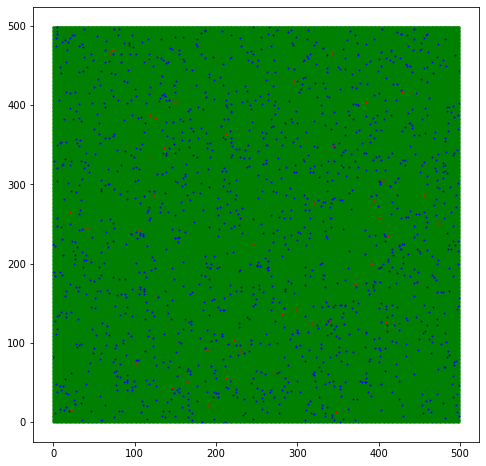

In [135]:
import matplotlib.pyplot as plt

x = list()
x2 = list()
x3 = list()
y = list()
y2 = list()
y3 = list()
fig, ax = plt.subplots(figsize=(8,8))
#plt.figure(figsize=(1,1))
for i in range(len(pointsEntrega)):
  x.append(pointsEntrega[i][0])
  y.append(pointsEntrega[i][1])
  
for i in range(len(pointsAlmacenes)):
  x2.append(pointsAlmacenes[i][0])
  y2.append(pointsAlmacenes[i][1])
  
for i in range(len(extraPoints)):
  x3.append(extraPoints[i][0])
  y3.append(extraPoints[i][1])

ax.scatter(x3,y3,color='green',s=1)
ax.scatter(x,y,color='blue',s=1)
ax.scatter(x2,y2,color='red',s=1)
plt.show()

In [136]:
def bfs(G, s):
  n = len(G)
  visited = [False]*n
  parent = [None]*n
  queue = [s]
  visited[s] = True
  contador = 0

  while queue:
    u = queue.pop(0)
    for v in range(len(G[u])):
      if v<(len(G[u])-2) and not visited[G[u][v]]:
        visited[G[u][v]] = True
        parent[G[u][v]] = u
        a = G[u][v] 
        if G[a][-2] == 1:
          contador +=1
        queue.append(G[u][v])
      if contador== cantidadPuntosEntrega:
        return parent

  return parent

In [ ]:
#Aplicar Dijkstra (BFS puesto que no hay pesos) de cada almacen a todos los puntos de entrega
cantidadPuntosEntrega=len(entrega)
for i in almacenes[:10]:
  print("Desde el nodo:",i)
  bfs(nodos,i)

Desde el nodo: 3265
Desde el nodo: 8272
Desde el nodo: 12516
Desde el nodo: 67621
Desde el nodo: 68710
Desde el nodo: 76707
Desde el nodo: 80662
Desde el nodo: 81249
Desde el nodo: 88723
Desde el nodo: 107537


In [137]:
def DBP(a,b):
  x1, y1=a
  x2, y2=b
  return abs(x1-x2)+ abs(y1-y2)

In [138]:
group = [-1]*len(pointsEntrega)
group2 = [-1]*len(extraPoints)

for i in range(len(pointsEntrega)):
  m=0
  d = DBP(pointsEntrega[i],pointsAlmacenes[0])
  for j in range(len(pointsAlmacenes)):
    d2 = DBP(pointsEntrega[i],pointsAlmacenes[j])
    if d2 <d:
      d = d2
      m = j
  group[i]=m

for i in range(len(extraPoints)):
  m=0
  d = DBP(extraPoints[i],pointsAlmacenes[0])
  for j in range(len(pointsAlmacenes)):
    d2 = DBP(extraPoints[i],pointsAlmacenes[j])
    if d2 <d:
      d = d2
      m = j
  group2[i]=m

In [140]:
nodesGroups = list()
for i in range(len(pointsAlmacenes)):
  toAdd=list()
  almacen = pointsAlmacenes[i][0]+pointsAlmacenes[i][0]*nFilas
  toAdd.append(nodos[almacen-1])
  for j in range(len(group)):
    if group[j]==i:
      entrega = pointsEntrega[j][0]+pointsEntrega[j][1]*nFilas
      toAdd.append(nodos[entrega-1])
  for j in range(len(group2)):
    if group2[j]==i:
      entrega = extraPoints[j][0]+extraPoints[j][1]*nFilas
      toAdd.append(nodos[entrega-1])
  nodesGroups.append(toAdd)


In [141]:
groupSelected = list()
for i in nodesGroups:
  if len(groupSelected)==0:
    groupSelected=i
  else:
    if len(groupSelected)>len(i):
      groupSelected=i

In [144]:
for i in range(len(groupSelected)):
  j=i
  nToCompare =groupSelected[i][-1]
  while j<len(groupSelected)-1:
    j+=1
    mToCompare =groupSelected[j][-1]
    if n<m:
      groupSelected[i],groupSelected[j]=groupSelected[j],groupSelected[i]


In [146]:
toReplaced = 0
for i in range(len(groupSelected)):
  toReplaced=groupSelected[i][-1]
  for j in range(len(groupSelected)):
    for k in range(len(groupSelected[j])):
      if (k==len(groupSelected[j])-2):
        break
      else:
        if(groupSelected[j][k]==toReplaced):
          groupSelected[j][k]=i


In [148]:
for i in range(len(groupSelected)):
  j=0
  while j <len(groupSelected[i]):
    if j==len(groupSelected[i])-2:
      break
    else:
      if groupSelected[i][j]>=len(groupSelected):
        del groupSelected[i][j]
        j-=1
    j+=1

In [156]:
def bfsForGroups(G, s,pos):
  n = len(G)
  visited = [False]*n
  parent = [None]*n
  queue = [pos]
  visited[pos] = True
  contador = 0

  while queue:
    u = queue.pop(0)
    for v in range(len(G[u])):
      if v<(len(G[u])-2) and not visited[G[u][v]]:
        visited[G[u][v]] = True
        parent[G[u][v]] = u
        a = G[u][v] 
        if G[a][-2] == 1:
          contador +=1
        queue.append(G[u][v])

  return parent

In [157]:
almacen = list()
pos = 0
for i in range(len(groupSelected)):
  if groupSelected[i][-2]==2:
    almacen=groupSelected[i]
    pos = i
    break
print(bfsForGroups(groupSelected,almacen[-1],pos))

[1, 3, 4, 6, 7, 8, 644, 10, 11, 12, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 120, 121, 122, 123, 124, 125, None, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 148, 149, 150, 151, 152, 153, 125, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 177, 178, 179, 180, 181, 182, 153, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 206, 207, 645, 209, 210, 182, 210, 211, 212, 213, 214,